<a href="https://colab.research.google.com/github/SAGARIKA-SHAH/ppg_lstm/blob/main/ppg_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

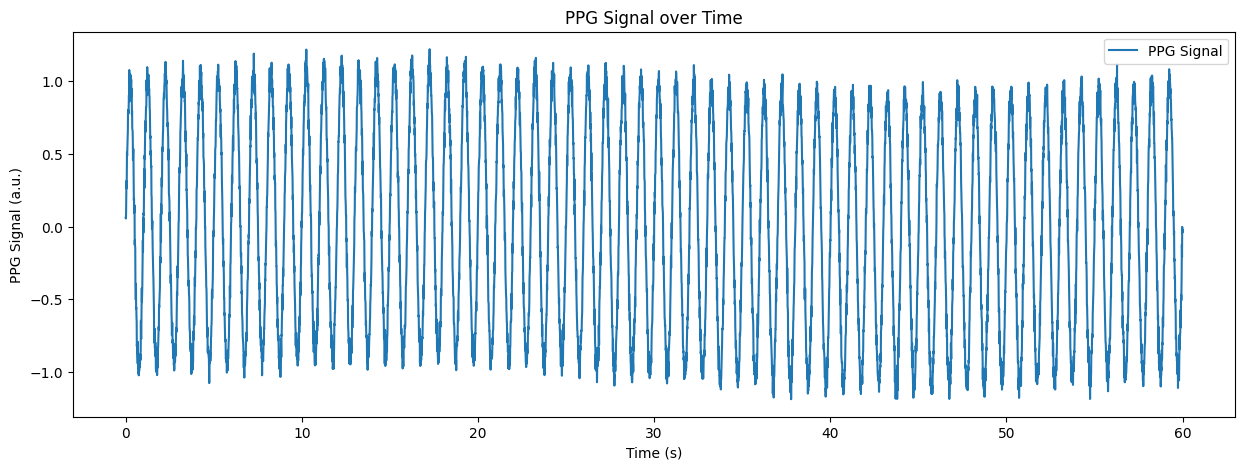

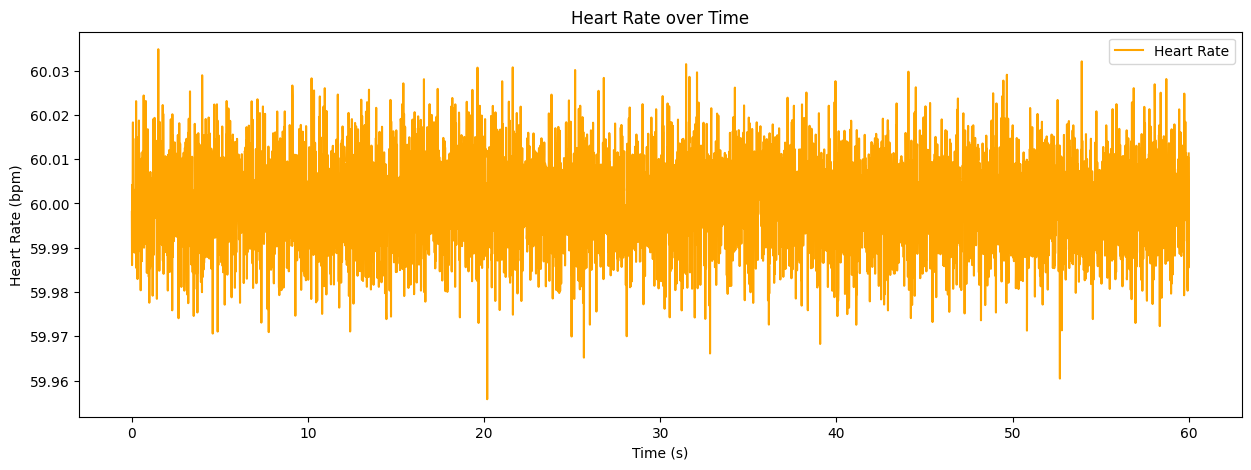

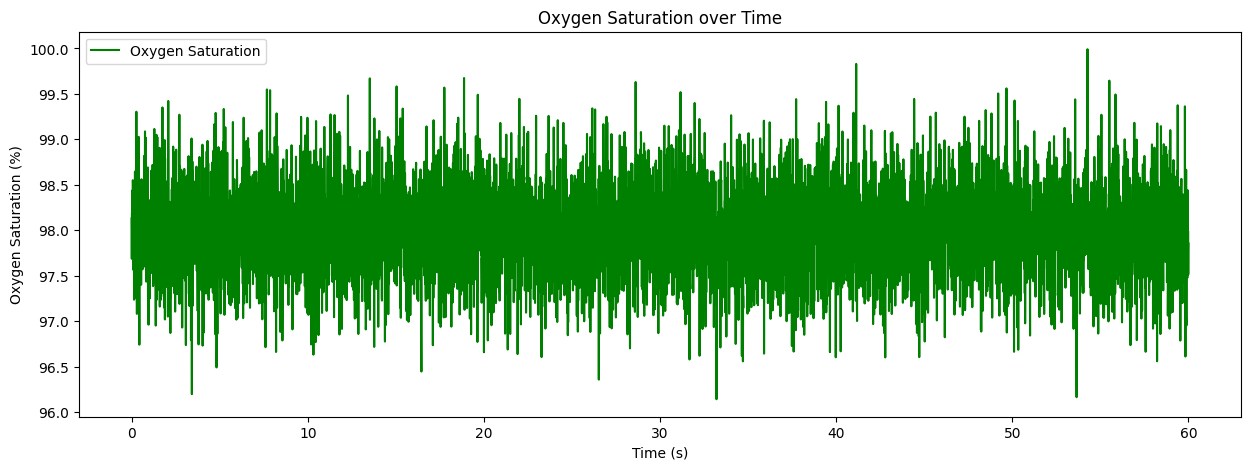

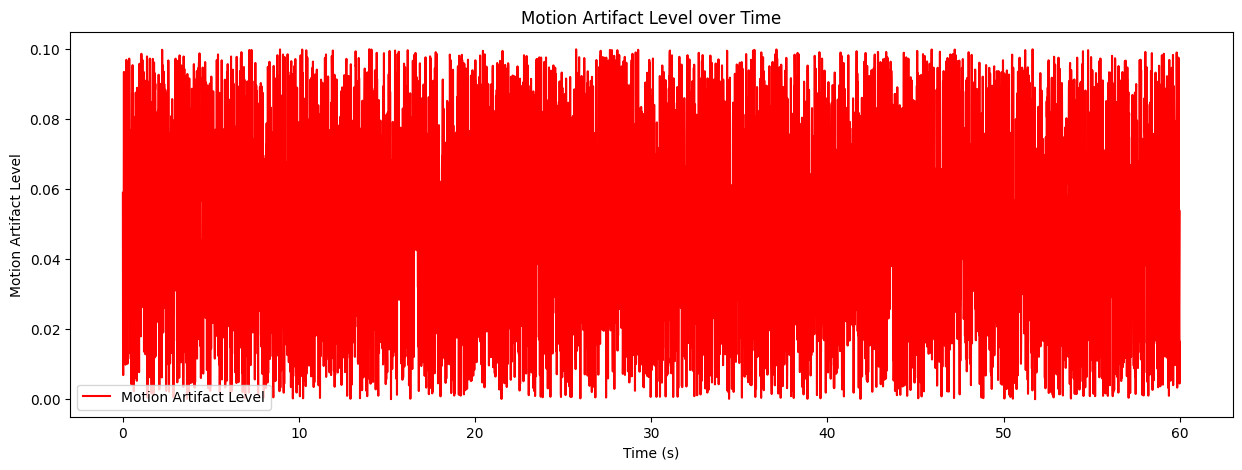

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the synthetic PPG data
ppg_data = pd.read_csv('synthetic_ppg_data.csv')

# Plot the PPG signal
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['PPG Signal (a.u.)'], label='PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('PPG Signal (a.u.)')
plt.title('PPG Signal over Time')
plt.legend()
plt.show()

# Plot the Heart Rate
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['Heart Rate (bpm)'], label='Heart Rate', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.legend()
plt.show()

# Plot the Oxygen Saturation
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['Oxygen Saturation (%)'], label='Oxygen Saturation', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Oxygen Saturation (%)')
plt.title('Oxygen Saturation over Time')
plt.legend()
plt.show()

# Plot the Motion Artifact Level
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['Motion Artifact Level'], label='Motion Artifact Level', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Motion Artifact Level')
plt.title('Motion Artifact Level over Time')
plt.legend()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
ppg_data[['PPG Signal (a.u.)', 'Heart Rate (bpm)', 'Oxygen Saturation (%)', 'Motion Artifact Level']] = scaler.fit_transform(
    ppg_data[['PPG Signal (a.u.)', 'Heart Rate (bpm)', 'Oxygen Saturation (%)', 'Motion Artifact Level']]
)


In [15]:
# Define mood classification criteria based on PPG signal characteristics
def classify_mood(ppg_signal, heart_rate, motion_artifact):
    if motion_artifact < 0.2 and np.std(ppg_signal) < 0.1:
        return 'calm'
    elif motion_artifact > 0.5 and heart_rate > 0.2:
        return 'stressed'
    elif motion_artifact > 0.3 and heart_rate > 0.1:
        return 'anxious'
    elif heart_rate < 0.1:
        return 'sad'
    else:
        return 'unknown'

# Label the data based on the classification criteria
window_size = 300  # 3 seconds window with 100Hz sampling rate
step_size = 100    # 1 second step
labels = []
for i in range(0, len(ppg_data) - window_size, step_size):
    ppg_window = ppg_data['PPG Signal (a.u.)'].values[i:i + window_size]
    heart_rate_window = ppg_data['Heart Rate (bpm)'].values[i:i + window_size]
    motion_artifact_window = ppg_data['Motion Artifact Level'].values[i:i + window_size]
    label = classify_mood(ppg_window, heart_rate_window.mean(), motion_artifact_window.mean())
    labels.append(label)

# Remove 'unknown' labels for simplicity
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
labels = [labels[i] for i in valid_indices]
windows = [ppg_data[['PPG Signal (a.u.)', 'Heart Rate (bpm)', 'Oxygen Saturation (%)', 'Motion Artifact Level']].values[i:i + window_size] for i in valid_indices]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(windows, categorical_labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 4), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(np.array(X_train), np.array(y_train), epochs=20, batch_size=32, validation_data=(np.array(X_test), np.array(y_test)))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 6s 728ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 1s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 1s 278ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 1s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 1s 278ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 1s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 1s 357ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

1/1 [==============================] - 1s 1s/step


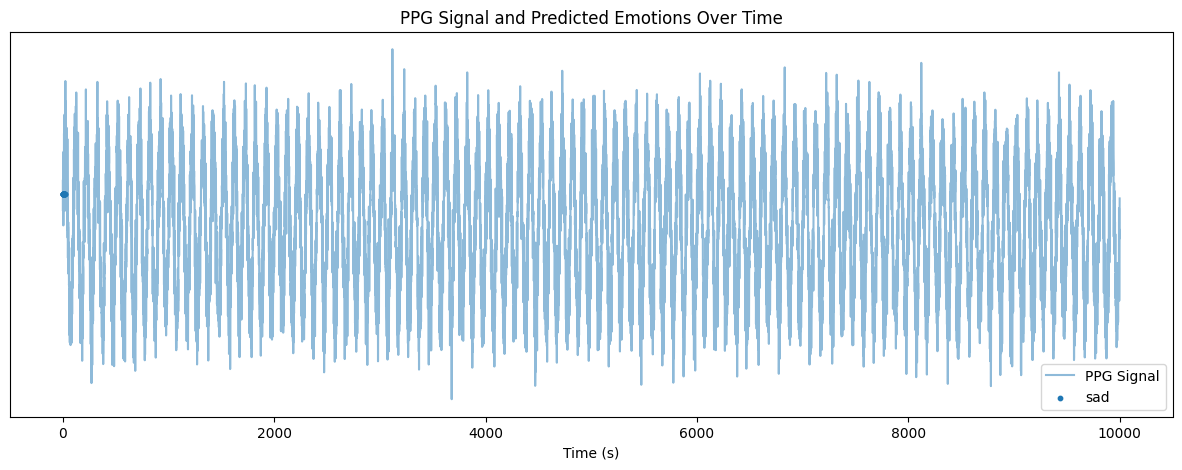

In [17]:
# Predict on the test set
y_pred = model.predict(np.array(X_test))
predicted_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Create a time axis for the predictions
predicted_time = np.arange(0, len(predicted_labels)) * step_size / 100.0  # Convert to seconds

# Plot the PPG signal with predicted emotions
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['PPG Signal (a.u.)'], label='PPG Signal', alpha=0.5)

# Scatter plot for each emotion
for emotion in label_encoder.classes_:
    emotion_indices = [i for i, label in enumerate(predicted_labels) if label == emotion]
    plt.scatter(predicted_time[emotion_indices], [0.5] * len(emotion_indices), label=emotion, s=10)

plt.xlabel('Time (s)')
plt.yticks([], [])
plt.title('PPG Signal and Predicted Emotions Over Time')
plt.legend()
plt.show()


1/1 [==============================] - 0s 71ms/step


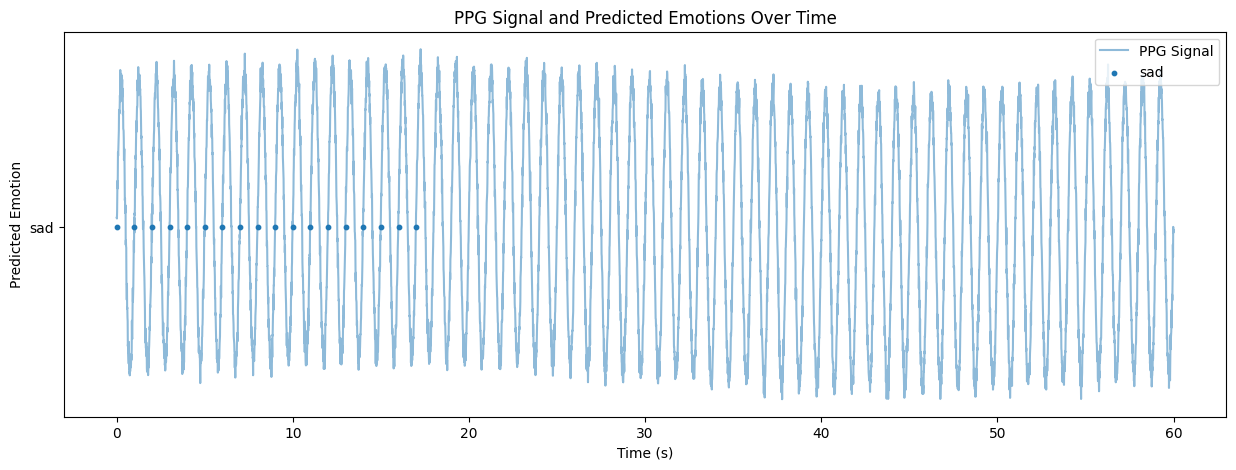

In [20]:
# Predict on the test set
y_pred = model.predict(np.array(X_test))
predicted_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Create a time axis for the predictions
predicted_time = np.arange(0, len(predicted_labels)) * step_size / 100.0  # Convert to seconds

# Plot the PPG signal with predicted emotions
plt.figure(figsize=(15, 5))
plt.plot(ppg_data['Time (s)'], ppg_data['PPG Signal (a.u.)'], label='PPG Signal', alpha=0.5)

# Scatter plot for each emotion
for emotion in label_encoder.classes_:
    emotion_indices = [i for i, label in enumerate(predicted_labels) if label == emotion]
    plt.scatter(predicted_time[emotion_indices], [emotion] * len(emotion_indices), label=emotion, s=10)

plt.xlabel('Time (s)')
plt.ylabel('Predicted Emotion')
plt.title('PPG Signal and Predicted Emotions Over Time')
plt.legend()
plt.show()
